In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
# To display all the columns of dataframe
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('dataset/preprocessed_data.csv',low_memory=False)

In [3]:
df.shape

(372541, 40)

- Target variable

In [4]:
df['loanStatus'].value_counts()

loanStatus
0    251922
1    120619
Name: count, dtype: int64

In [5]:
df.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'FirstPaymentDate', 'VerificationType', 'LanguageCode', 'Age', 'Gender',
       'Country', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'MonthlyPayment', 'UseOfLoan', 'Education', 'MaritalStatus',
       'EmploymentStatus', 'EmploymentDurationCurrentEmployer',
       'OccupationArea', 'HomeOwnershipType', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay', 'Rating',
       'Restructured', 'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'loanStatus'],
      dtype='object')

<Axes: xlabel='loanStatus', ylabel='Count'>

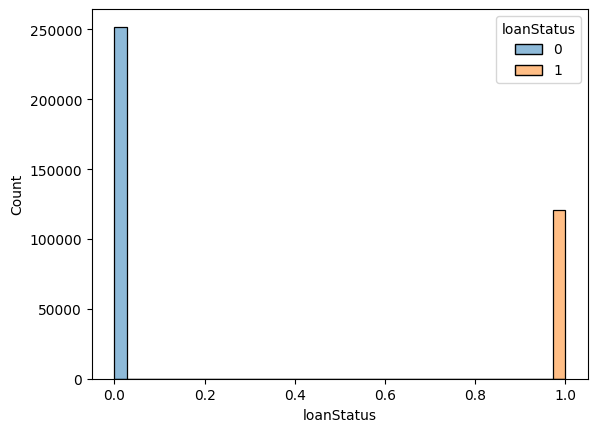

In [6]:
sns.histplot(data=df,x='loanStatus',hue=df['loanStatus'])

## most of the loans are not defaulted (not accepted)

In [7]:
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,FirstPaymentDate,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,loanStatus
0,11,0.0,88.0,False,2022-10-07,Income and expenses verified,Estonian,27,Woman,Estonia,3189.0,3189.0,35.48,60,115.34,NaN,Vocational education,NaN,NaN,UpTo5Years,NaN,Other,900.0,0,0.00,0,0.00,0.00,7,D,False,M,721.65,1330.8600,2467.35,1.0,3402.0,1161.57,0.0,0
1,0,0.0,0.0,False,2023-06-05,Income and expenses verified,Finnish,35,Woman,Finland,4146.0,4146.0,19.86,60,108.17,NaN,Higher education,NaN,NaN,UpTo5Years,NaN,Owner,3100.0,0,0.00,0,0.00,0.00,3,B,True,M,272.34,493.8575,3873.66,1.0,518.0,525.21,0.0,0
2,0,0.0,0.0,False,2024-02-23,Income and expenses verified,Estonian,23,Male,Estonia,531.0,531.0,19.52,60,15.25,NaN,Higher education,NaN,NaN,UpTo5Years,NaN,"Tenant, pre-furnished property",1700.0,0,0.00,0,0.00,0.00,23,B,False,M,5.52,5.0700,525.48,3.0,1593.0,631.35,0.0,0
3,970,1150.0,5.0,False,2016-05-12,Income and expenses verified,Estonian,53,Woman,Estonia,2125.0,2125.0,20.97,60,62.05,Home improvement,Secondary Education,Cohabitant,Retiree,MoreThan5Years,Other,Owner,354.0,8,485.09,6,26.29,10.92,12,C,False,NaN,1026.77,1187.9100,0.00,1.0,500.0,590.95,0.0,1
4,0,0.0,0.0,False,2023-10-04,Income and expenses verified,Finnish,43,Male,Finland,414.0,414.0,19.89,108,6.65,NaN,Vocational education,NaN,NaN,Other,NaN,"Tenant, pre-furnished property",1200.0,0,0.00,0,0.00,0.00,4,D,False,M,9.05,32.9175,404.95,5.0,11198.0,1176.22,0.0,0


In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372541 entries, 0 to 372540
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   BidsPortfolioManager                    372541 non-null  int64  
 1   BidsApi                                 372541 non-null  float64
 2   BidsManual                              372541 non-null  float64
 3   NewCreditCustomer                       372541 non-null  bool   
 4   FirstPaymentDate                        372541 non-null  object 
 5   VerificationType                        372491 non-null  object 
 6   LanguageCode                            372541 non-null  object 
 7   Age                                     372541 non-null  int64  
 8   Gender                                  372496 non-null  object 
 9   Country                                 372541 non-null  object 
 10  AppliedAmount                           3725

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BidsPortfolioManager,372541.0,408.871555,940.004887,0.00,0.00,76.00,327.0000,10625.00
BidsApi,372541.0,15.004781,103.731420,0.00,0.00,0.00,2.0000,7570.00
BidsManual,372541.0,261.478790,563.463318,0.00,0.00,41.00,255.6465,10631.00
Age,372541.0,40.420840,12.185787,0.00,31.00,39.00,49.0000,77.00
AppliedAmount,372541.0,2638.498189,2125.775881,10.00,829.00,2126.00,4146.0000,15948.00
Amount,372541.0,2563.610287,2041.094626,6.39,829.00,2125.00,4146.0000,15948.00
Interest,372541.0,27.367614,18.342253,2.00,18.88,21.00,32.6000,264.31
LoanDuration,372541.0,49.922296,18.062537,1.00,36.00,60.00,60.0000,120.00
MonthlyPayment,365851.0,98.773856,92.852001,0.00,33.37,85.89,118.8100,2368.54
IncomeTotal,372541.0,2148.176117,9783.885383,0.00,1053.00,1600.00,2400.0000,1012019.00


## Visualizing missing values


<Axes: >

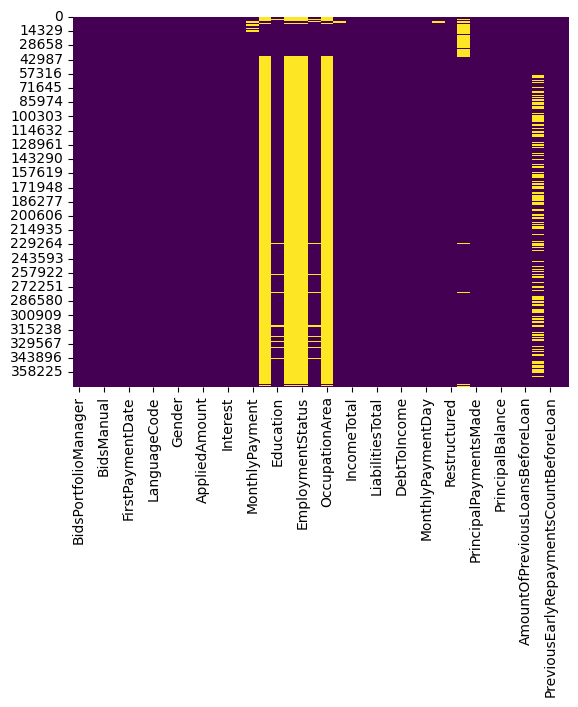

In [10]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [11]:
df.isnull().sum()

BidsPortfolioManager                           0
BidsApi                                        0
BidsManual                                     0
NewCreditCustomer                              0
FirstPaymentDate                               0
VerificationType                              50
LanguageCode                                   0
Age                                            0
Gender                                        45
Country                                        0
AppliedAmount                                  0
Amount                                         0
Interest                                       0
LoanDuration                                   0
MonthlyPayment                              6690
UseOfLoan                                 335953
Education                                  10732
MaritalStatus                             336011
EmploymentStatus                          336187
EmploymentDurationCurrentEmployer          10896
OccupationArea      

## Imputing missing values more than 5% other than that we Drop them

In [12]:
df['VerificationType'].isnull().sum()

50

In [13]:
missing_categorical=['VerificationType','Gender','Education','EmploymentDurationCurrentEmployer',
                     'HomeOwnershipType','Rating','CreditScoreEsMicroL']
missing_numerical=['MonthlyPayment','DebtToIncome','FreeCash','PreviousRepaymentsBeforeLoan']

In [14]:
df['CreditScoreEsMicroL']=df['CreditScoreEsMicroL'].fillna(df['CreditScoreEsMicroL'].mode())

In [15]:
for col in missing_categorical:
    df[col]= df[col].interpolate('ffill')
    df[col]= df[col].interpolate('bfill')
    
    
for col in missing_numerical:
    mean=df[col].mean()
    print(mean)
    df[col].fillna(mean,inplace=True)

98.7738557226849
2.8049251122845913
44.13316222405373
1180.613136994062


In [16]:
df.isnull().sum()

BidsPortfolioManager                           0
BidsApi                                        0
BidsManual                                     0
NewCreditCustomer                              0
FirstPaymentDate                               0
VerificationType                               0
LanguageCode                                   0
Age                                            0
Gender                                         0
Country                                        0
AppliedAmount                                  0
Amount                                         0
Interest                                       0
LoanDuration                                   0
MonthlyPayment                                 0
UseOfLoan                                 335953
Education                                      0
MaritalStatus                             336011
EmploymentStatus                          336187
EmploymentDurationCurrentEmployer              0
OccupationArea      

## we can notice that some values contains alot of null values but we will need this columns for answering some of our questions so we will not drop them until we are finished with EDA step and start modelling part

### some additional Data Processing

In [17]:
from sklearn.preprocessing import LabelEncoder

df_copy = df.copy()
# Convert date to datetime and extract features
df_copy['FirstPaymentDate'] = pd.to_datetime(df_copy['FirstPaymentDate'])
df_copy['Year'] = df_copy['FirstPaymentDate'].dt.year
df_copy['Month'] = df_copy['FirstPaymentDate'].dt.month
df_copy['Day'] = df_copy['FirstPaymentDate'].dt.day

# Drop the original date column
df_copy.drop('FirstPaymentDate', axis=1, inplace=True)

# Convert categorical variables to numerical form using label encoding
le = LabelEncoder()

categorical_cols = df_copy.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_copy[col] = le.fit_transform(df_copy[col])

<Axes: >

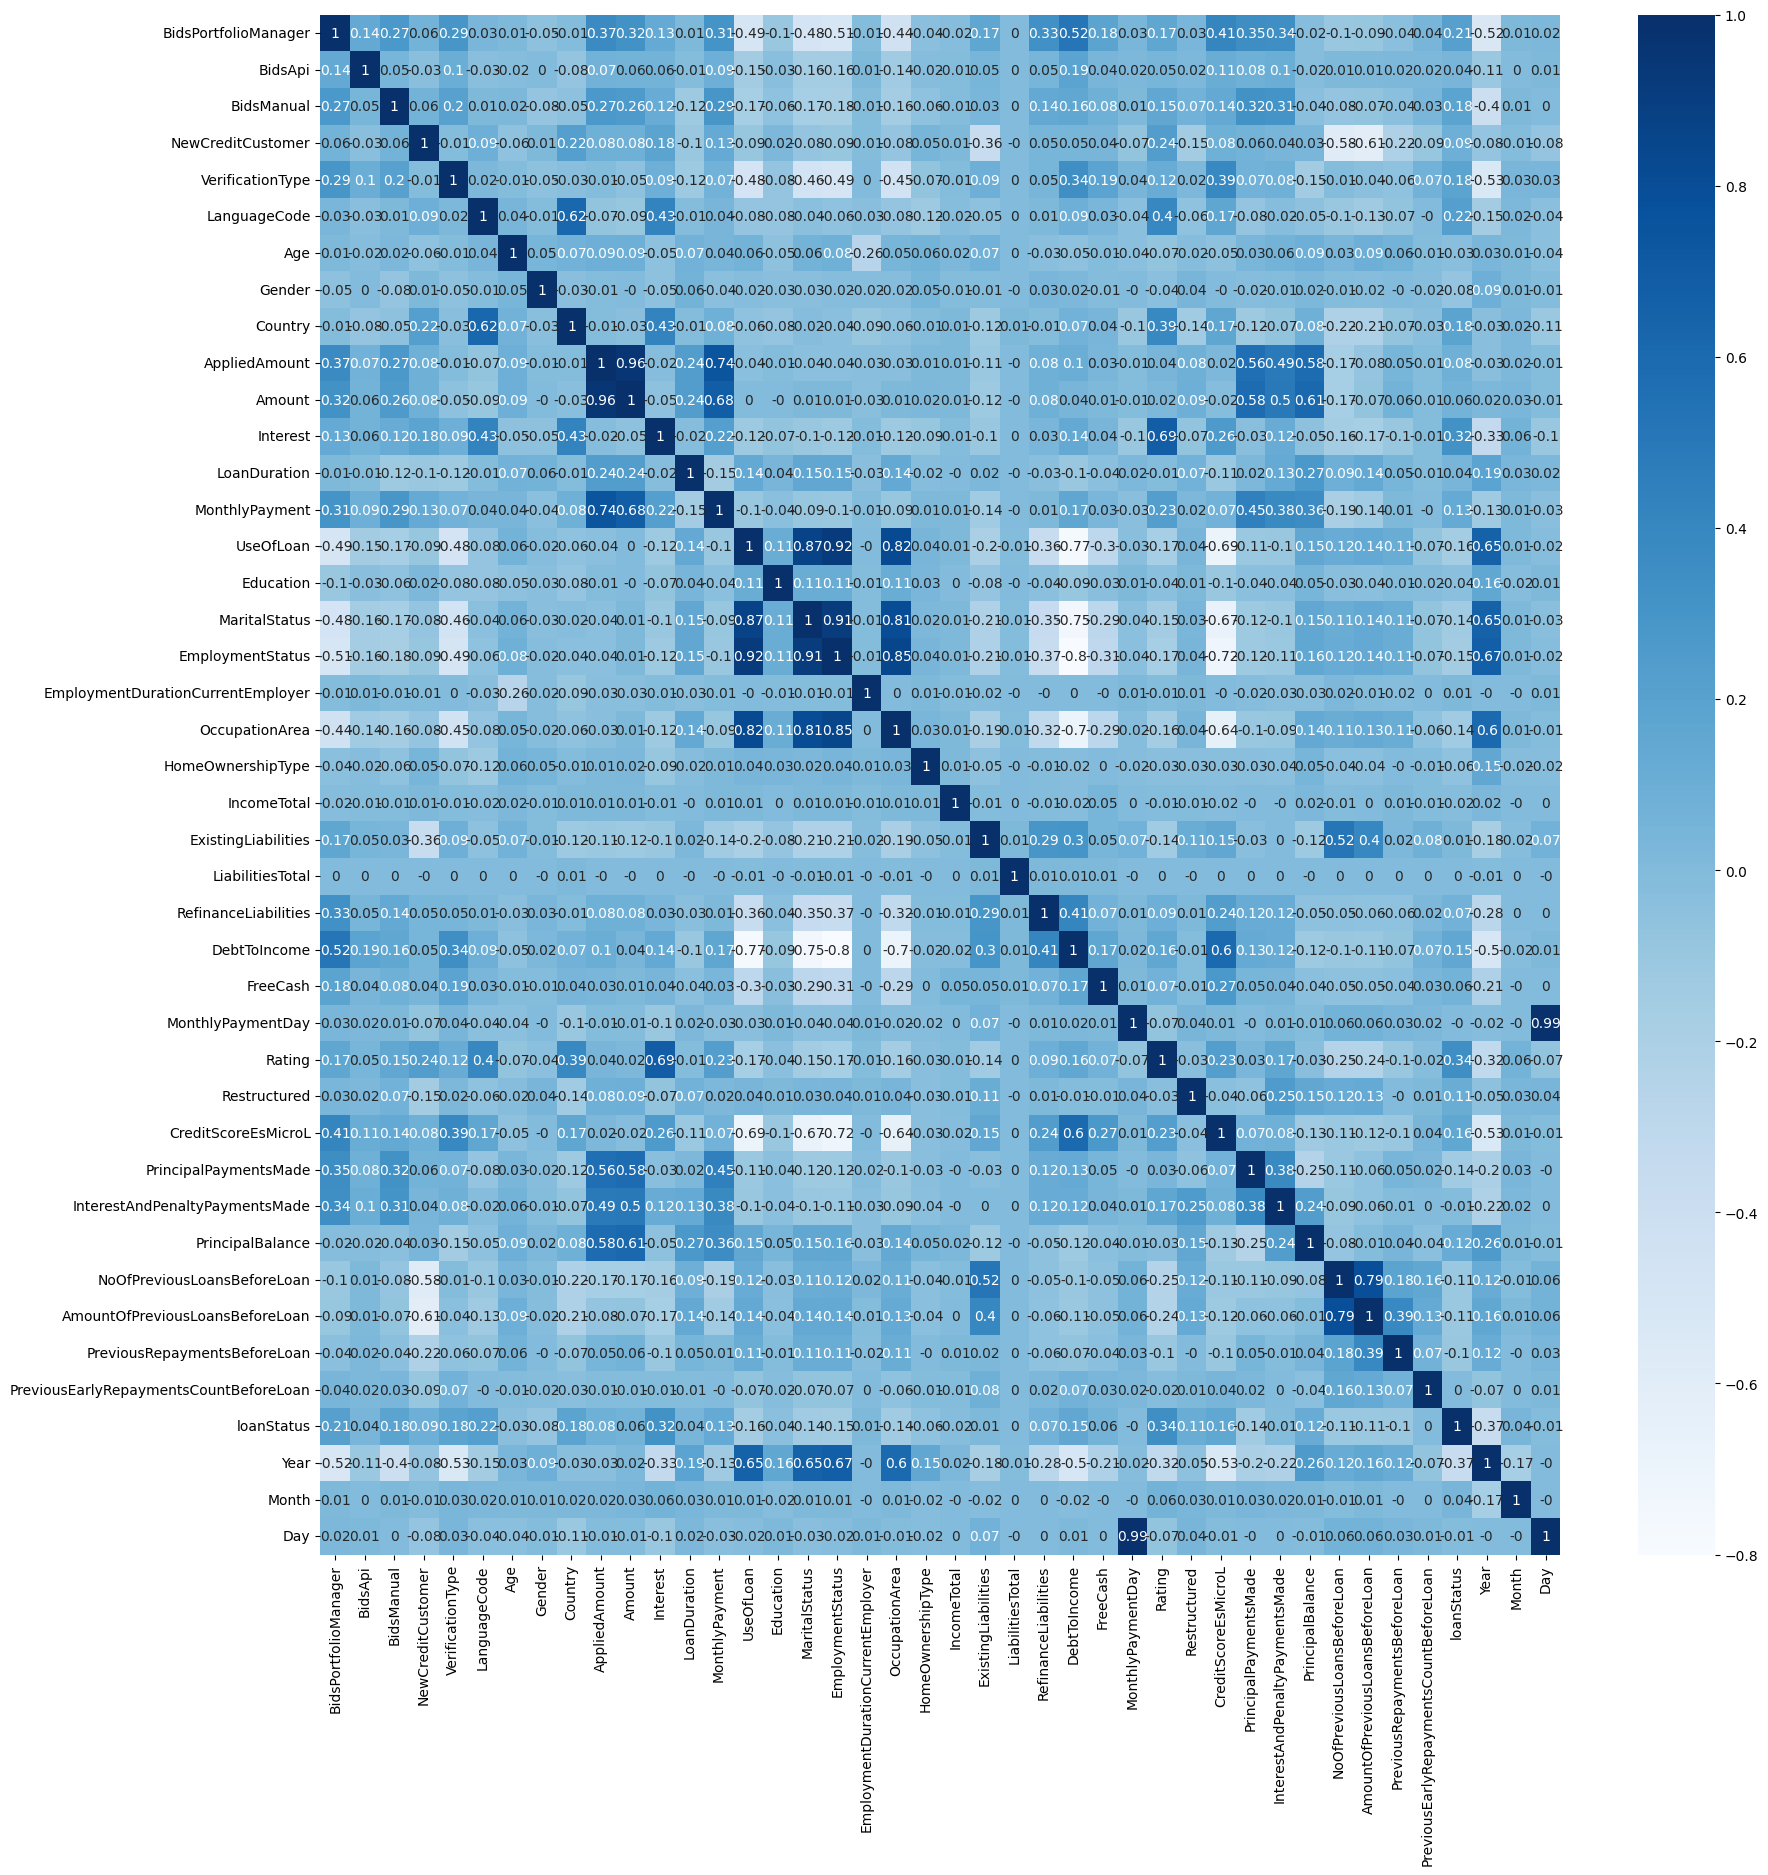

In [18]:
# create a heatmap to show the correlation between the features
plt.figure(figsize=(20,20))
sns.heatmap(df_copy.corr().round(decimals=2),cbar=True,annot=True,cmap='Blues')

## How does the Age affect the loan amount 

Text(0, 0.5, 'Loans Count')

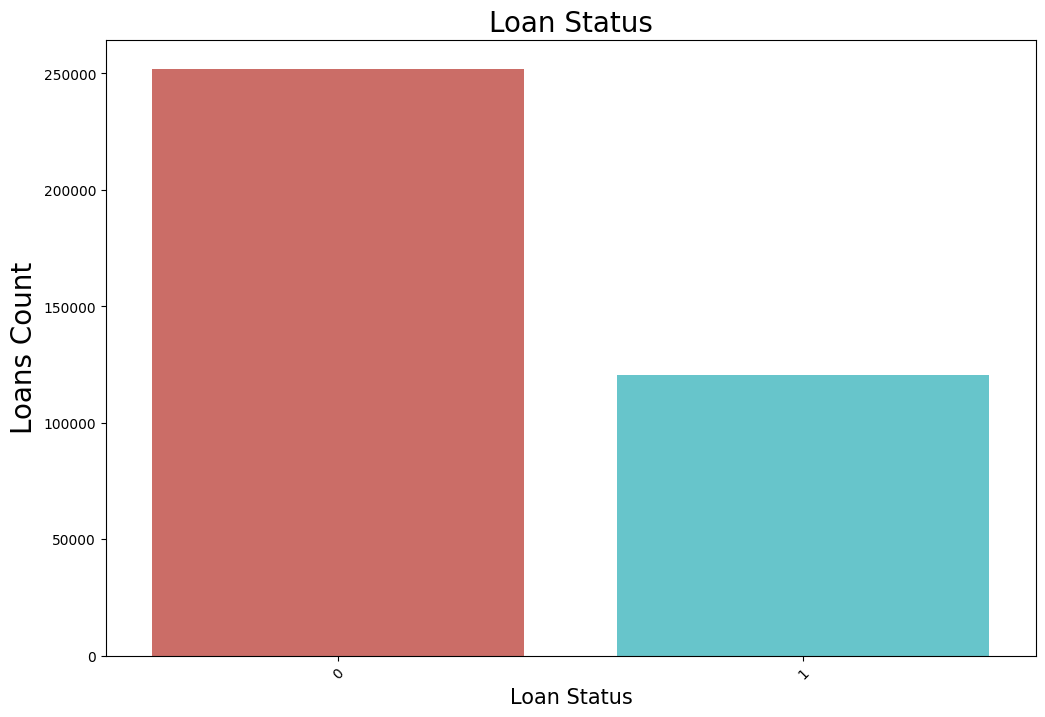

In [20]:
# Loan Status
plt.figure(figsize = (12,8))
g = sns.countplot(x="loanStatus",data=df,
                  palette='hls')
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Loan Status", fontsize=20)
g.set_xlabel("Loan Status", fontsize=15)
g.set_ylabel("Loans Count", fontsize=20)

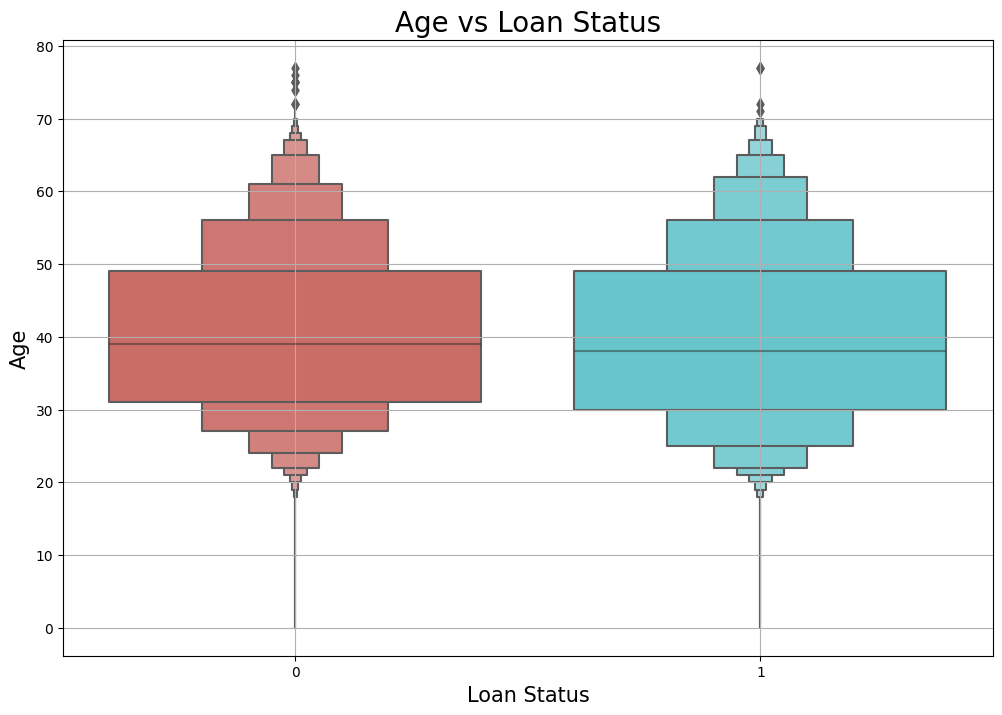

In [24]:
plt.figure(figsize=(12,8))
sns.boxenplot(x='loanStatus',y='Age',data=df,palette='hls')
plt.title('Age vs Loan Status', fontsize=20)
plt.xlabel('Loan Status', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.grid(True)
plt.show()


### from the plot we can see that loans are defaulted more at ages between 20 to 48 

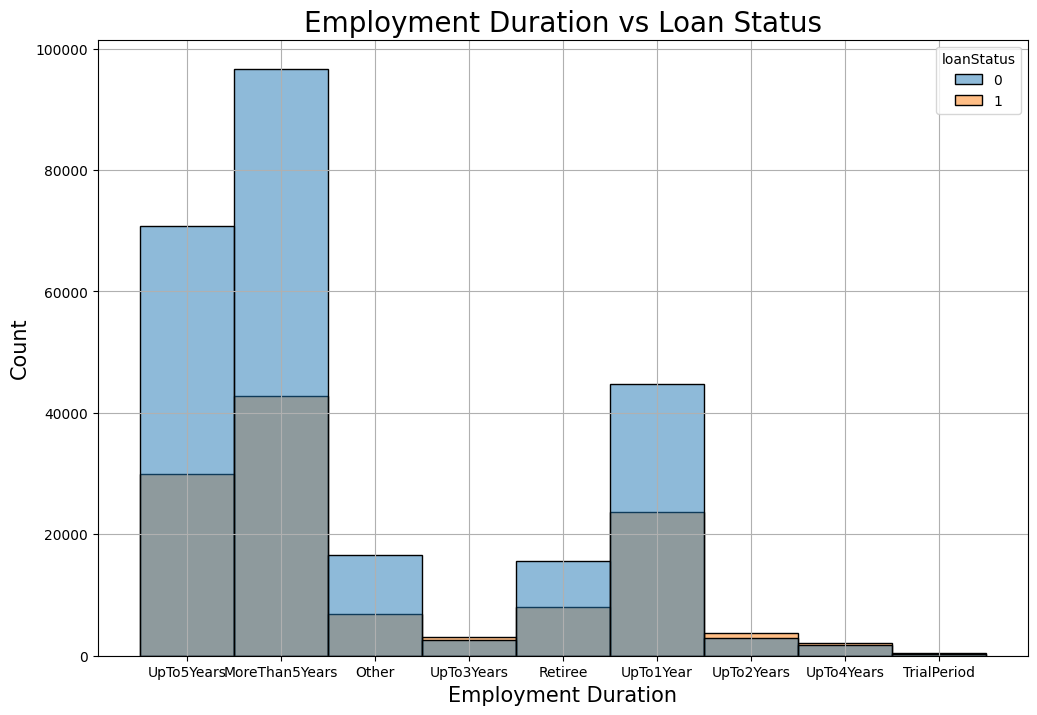

In [30]:
# Loan Status vs Employment Duration histogram show the distribution of Employment Duration for each Loan Status
plt.figure(figsize=(12,8))
sns.histplot(data=df,x='EmploymentDurationCurrentEmployer',hue=df['loanStatus'])
plt.title('Employment Duration vs Loan Status', fontsize=20)
plt.xlabel('Employment Duration', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(True)
plt.show()





### more than 5 years employment have high acceptance among all employee status but also highest loans rejected while employees up to 3 years and 2 years are most likely their loan be accepted


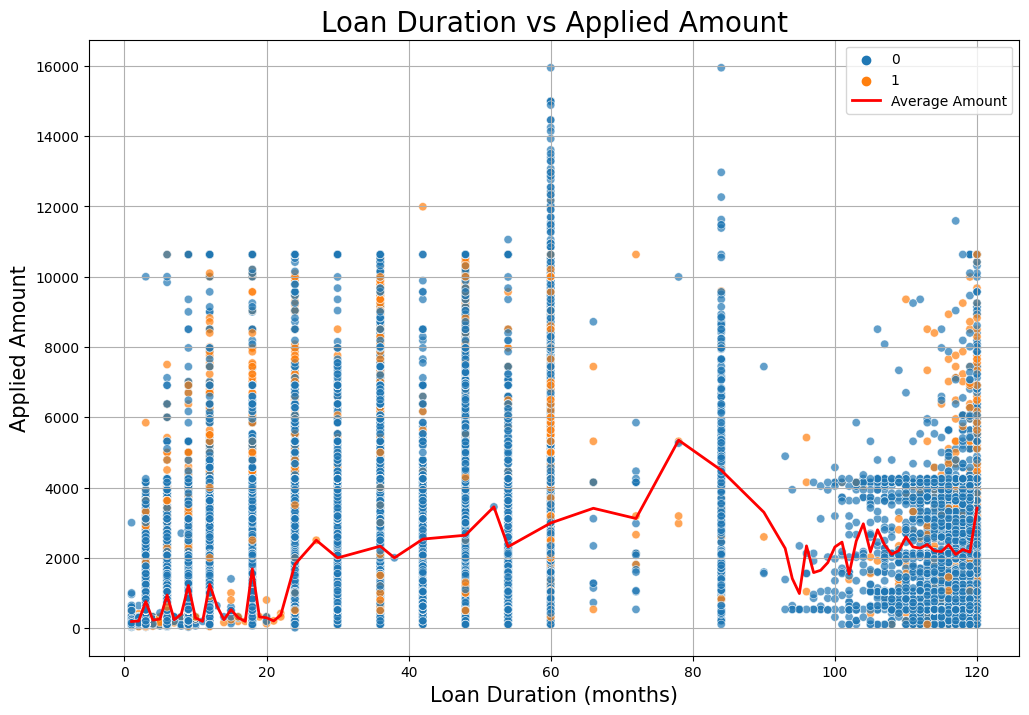

In [45]:
# Calculate average applied amount for each loan duration
avg_amount_by_duration = df.groupby('LoanDuration')['AppliedAmount'].mean().reset_index()

# Plot the scatterplot with average applied amount trend line
plt.figure(figsize=(12,8))
sns.scatterplot(x='LoanDuration', y='AppliedAmount', data=df, hue='loanStatus', alpha=0.7)
sns.lineplot(x='LoanDuration', y='AppliedAmount', data=avg_amount_by_duration, color='red', linewidth=2, label='Average Amount')

# Enhancements to the plot
plt.title('Loan Duration vs Applied Amount', fontsize=20)
plt.xlabel('Loan Duration (months)', fontsize=15)
plt.ylabel('Applied Amount', fontsize=15)
plt.grid(True)
plt.legend()
plt.show()


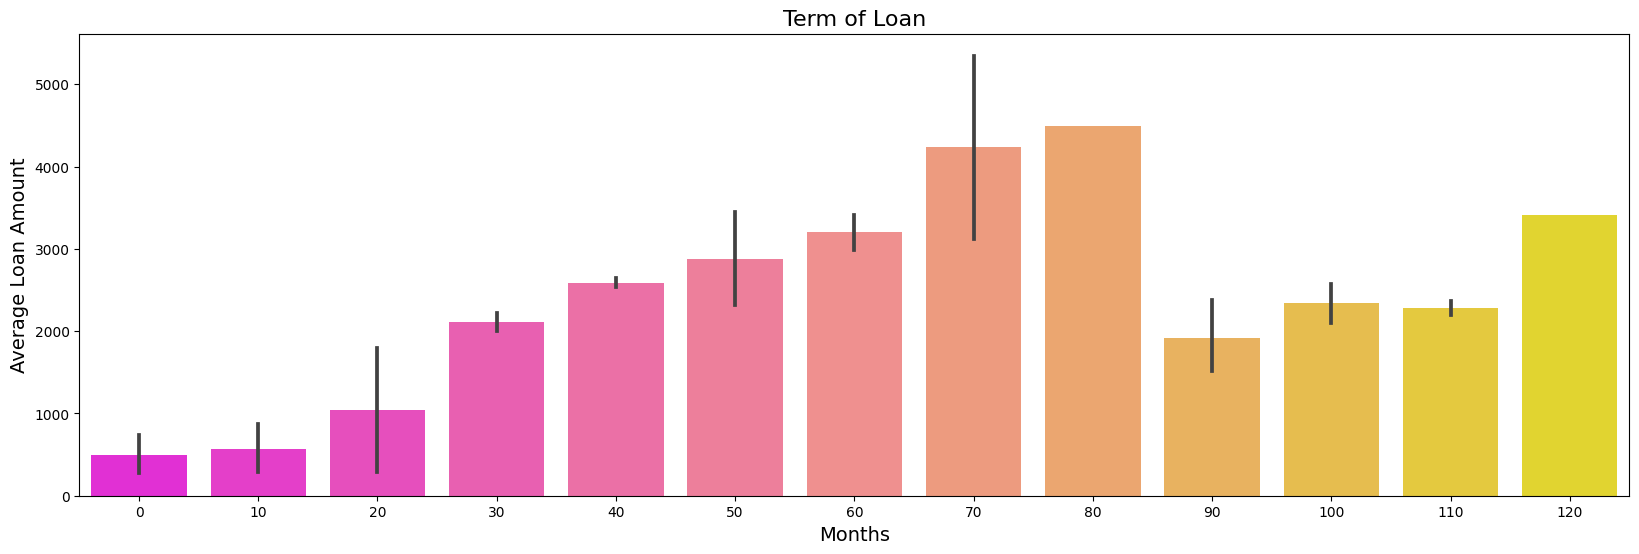

In [50]:
# Calculate average applied amount for each loan duration
avg_amount_by_duration = df.groupby('LoanDuration')['AppliedAmount'].mean().reset_index()

# group loan duration of every 10 months and calculate average applied amount
avg_amount_by_duration['LoanDuration'] = avg_amount_by_duration['LoanDuration'] // 10 * 10

# Bar plot of Term (Loan taken for number of months)
plt.figure(figsize=(20,6))
sns.barplot(x='LoanDuration', y='AppliedAmount', data=avg_amount_by_duration, palette='spring')
plt.title("Term of Loan", fontsize=16)
plt.xlabel("Months", fontsize=14)
plt.ylabel("Average Loan Amount", fontsize=14)
plt.show()

## Reasonable as long as loan duration increase loan amount increase it seems that the period of 70-80 months have the highest loan applied amounts

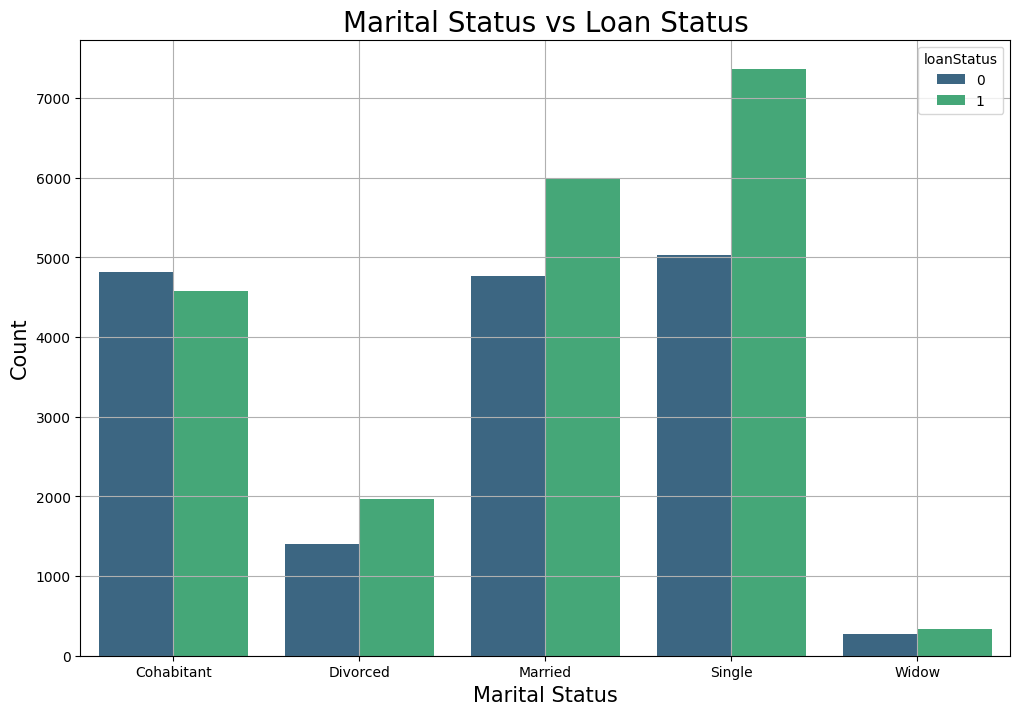

In [51]:
# martial status vs loan status
fig = plt.figure(figsize=(12,8))
sns.countplot(x='MaritalStatus',data=df,hue='loanStatus',palette='viridis')
plt.title('Marital Status vs Loan Status', fontsize=20)
plt.xlabel('Marital Status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(True)
plt.show()
 

### being single is more likely you can to get the loan

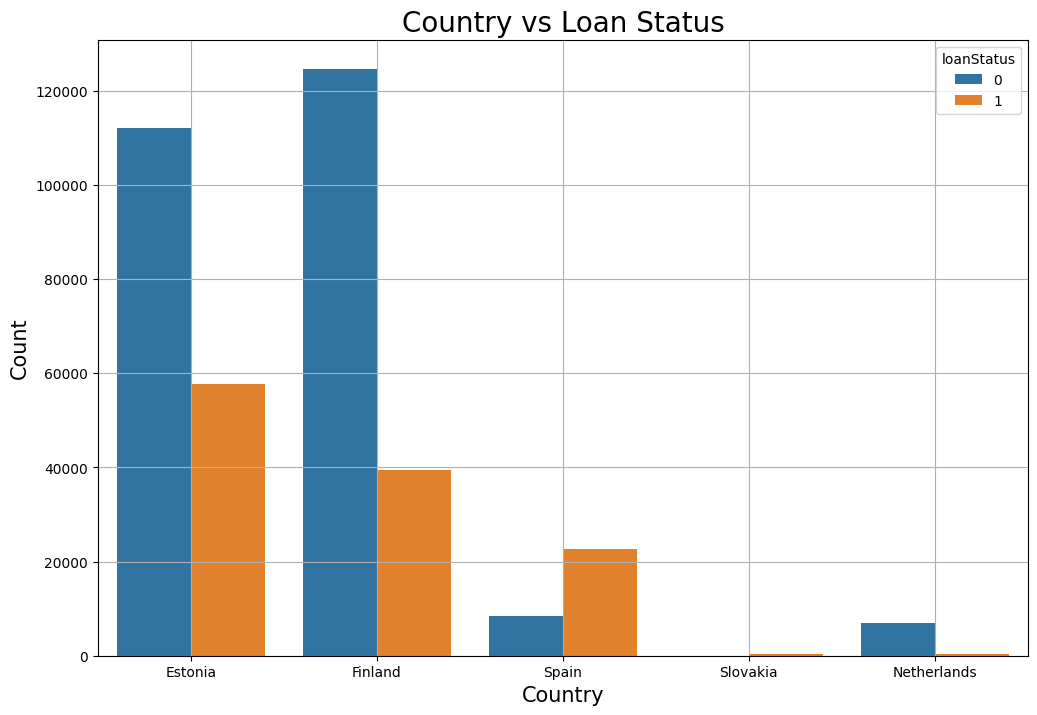

In [64]:
# geospatial analysis of loan status over the country
plt.figure(figsize=(12,8))
sns.countplot(x='Country',data=df,hue='loanStatus')
plt.title('Country vs Loan Status', fontsize=20)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(True)
plt.show()


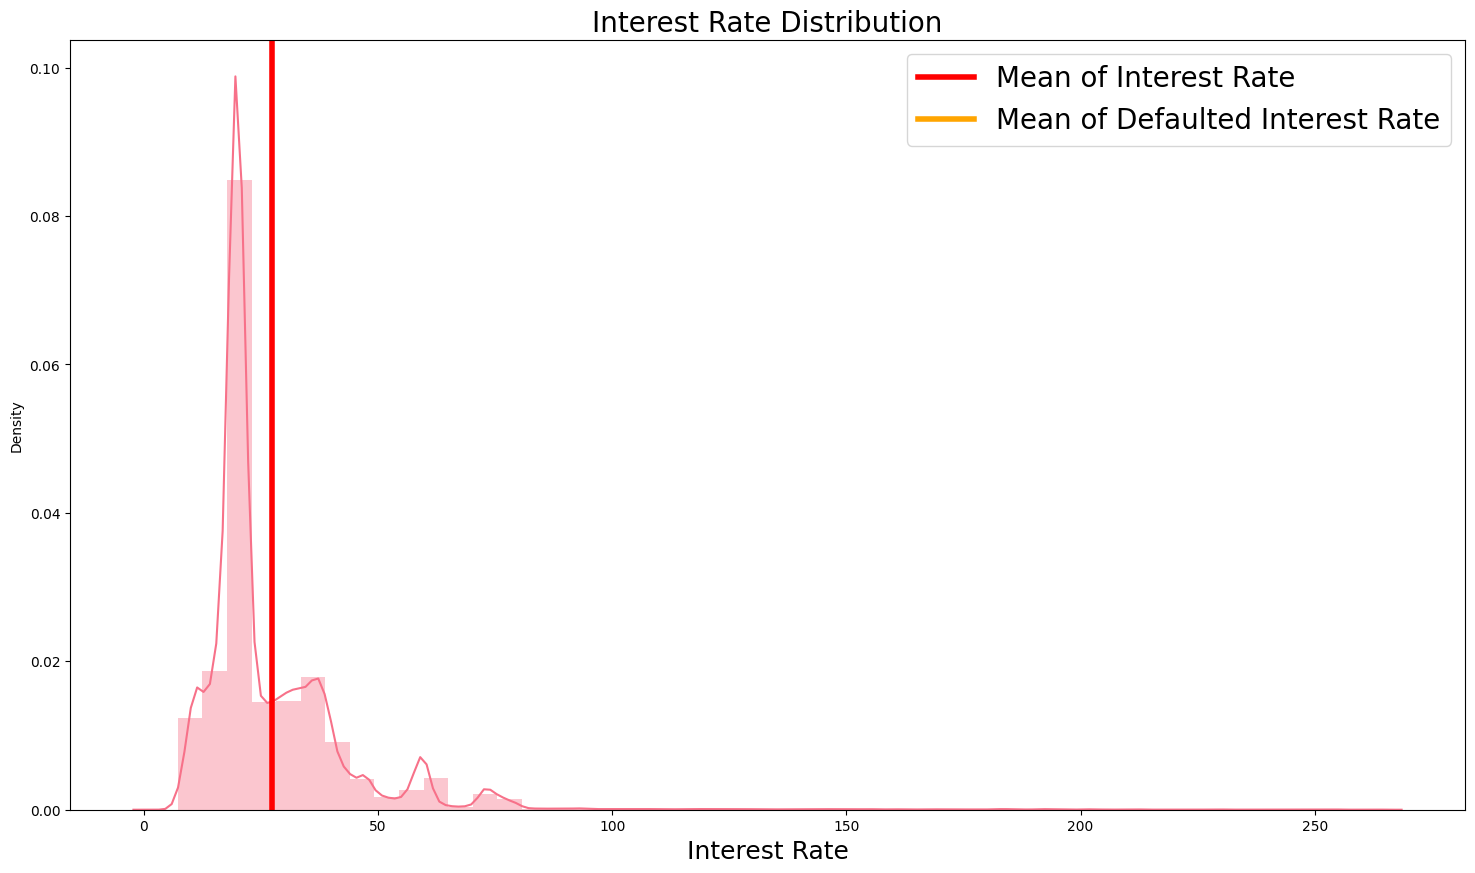

In [65]:
# Set new variable name to include only loans that are defaulted
default_vis = df[df.loanStatus == '1']

# Visualize the distribution of interest rates
sns.set_palette("husl")
plt.figure(figsize=(18,10))
sns.distplot(df['Interest'], hist='density')
plt.axvline(x=df.Interest.mean(), color='red', linestyle='-', lw=4, label='Mean of Interest Rate')
plt.axvline(x=default_vis.Interest.mean(), color='orange', linestyle='-', lw=4, label='Mean of Defaulted Interest Rate')
plt.title('Interest Rate Distribution', fontsize=20)
plt.xlabel('Interest Rate', fontsize=18)
plt.legend(fontsize=20)
plt.show()

### we can see that average interest rate for accepted loans is around 25%

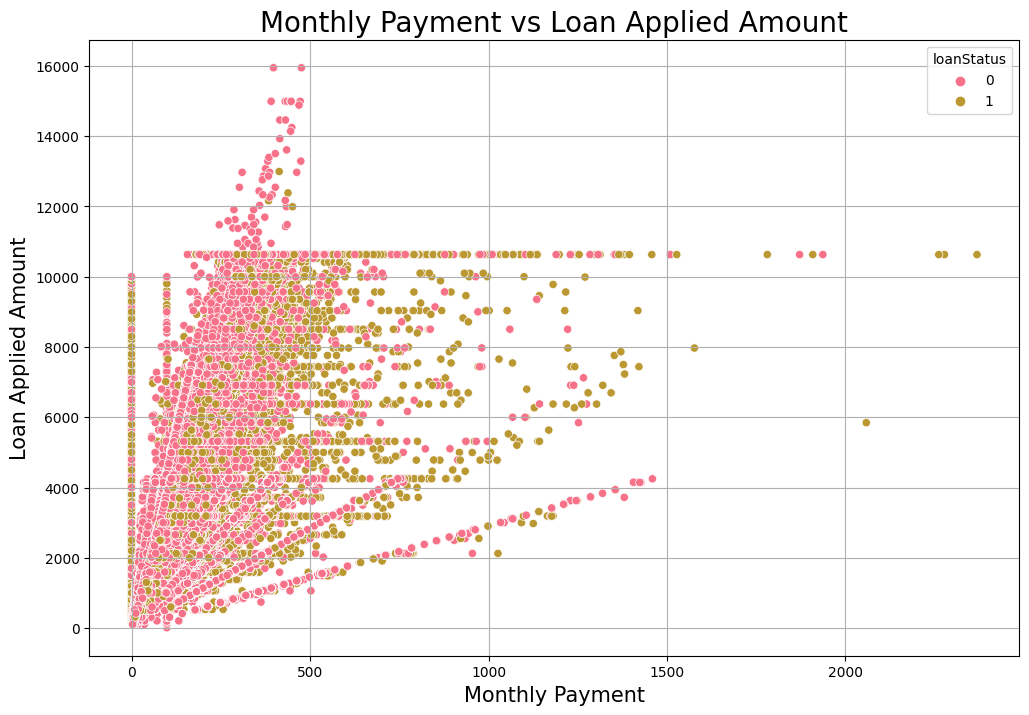

In [66]:
# Monthly Payment vs Loan applied amount and Loan status
plt.figure(figsize=(12,8))
sns.scatterplot(x='MonthlyPayment',y='AppliedAmount',data=df,hue='loanStatus')
plt.title('Monthly Payment vs Loan Applied Amount', fontsize=20)
plt.xlabel('Monthly Payment', fontsize=15)
plt.ylabel('Loan Applied Amount', fontsize=15)
plt.grid(True)
plt.show()


### we can see here that as monthly payment increase the amount of loans decrease but the number of defulted loans increase

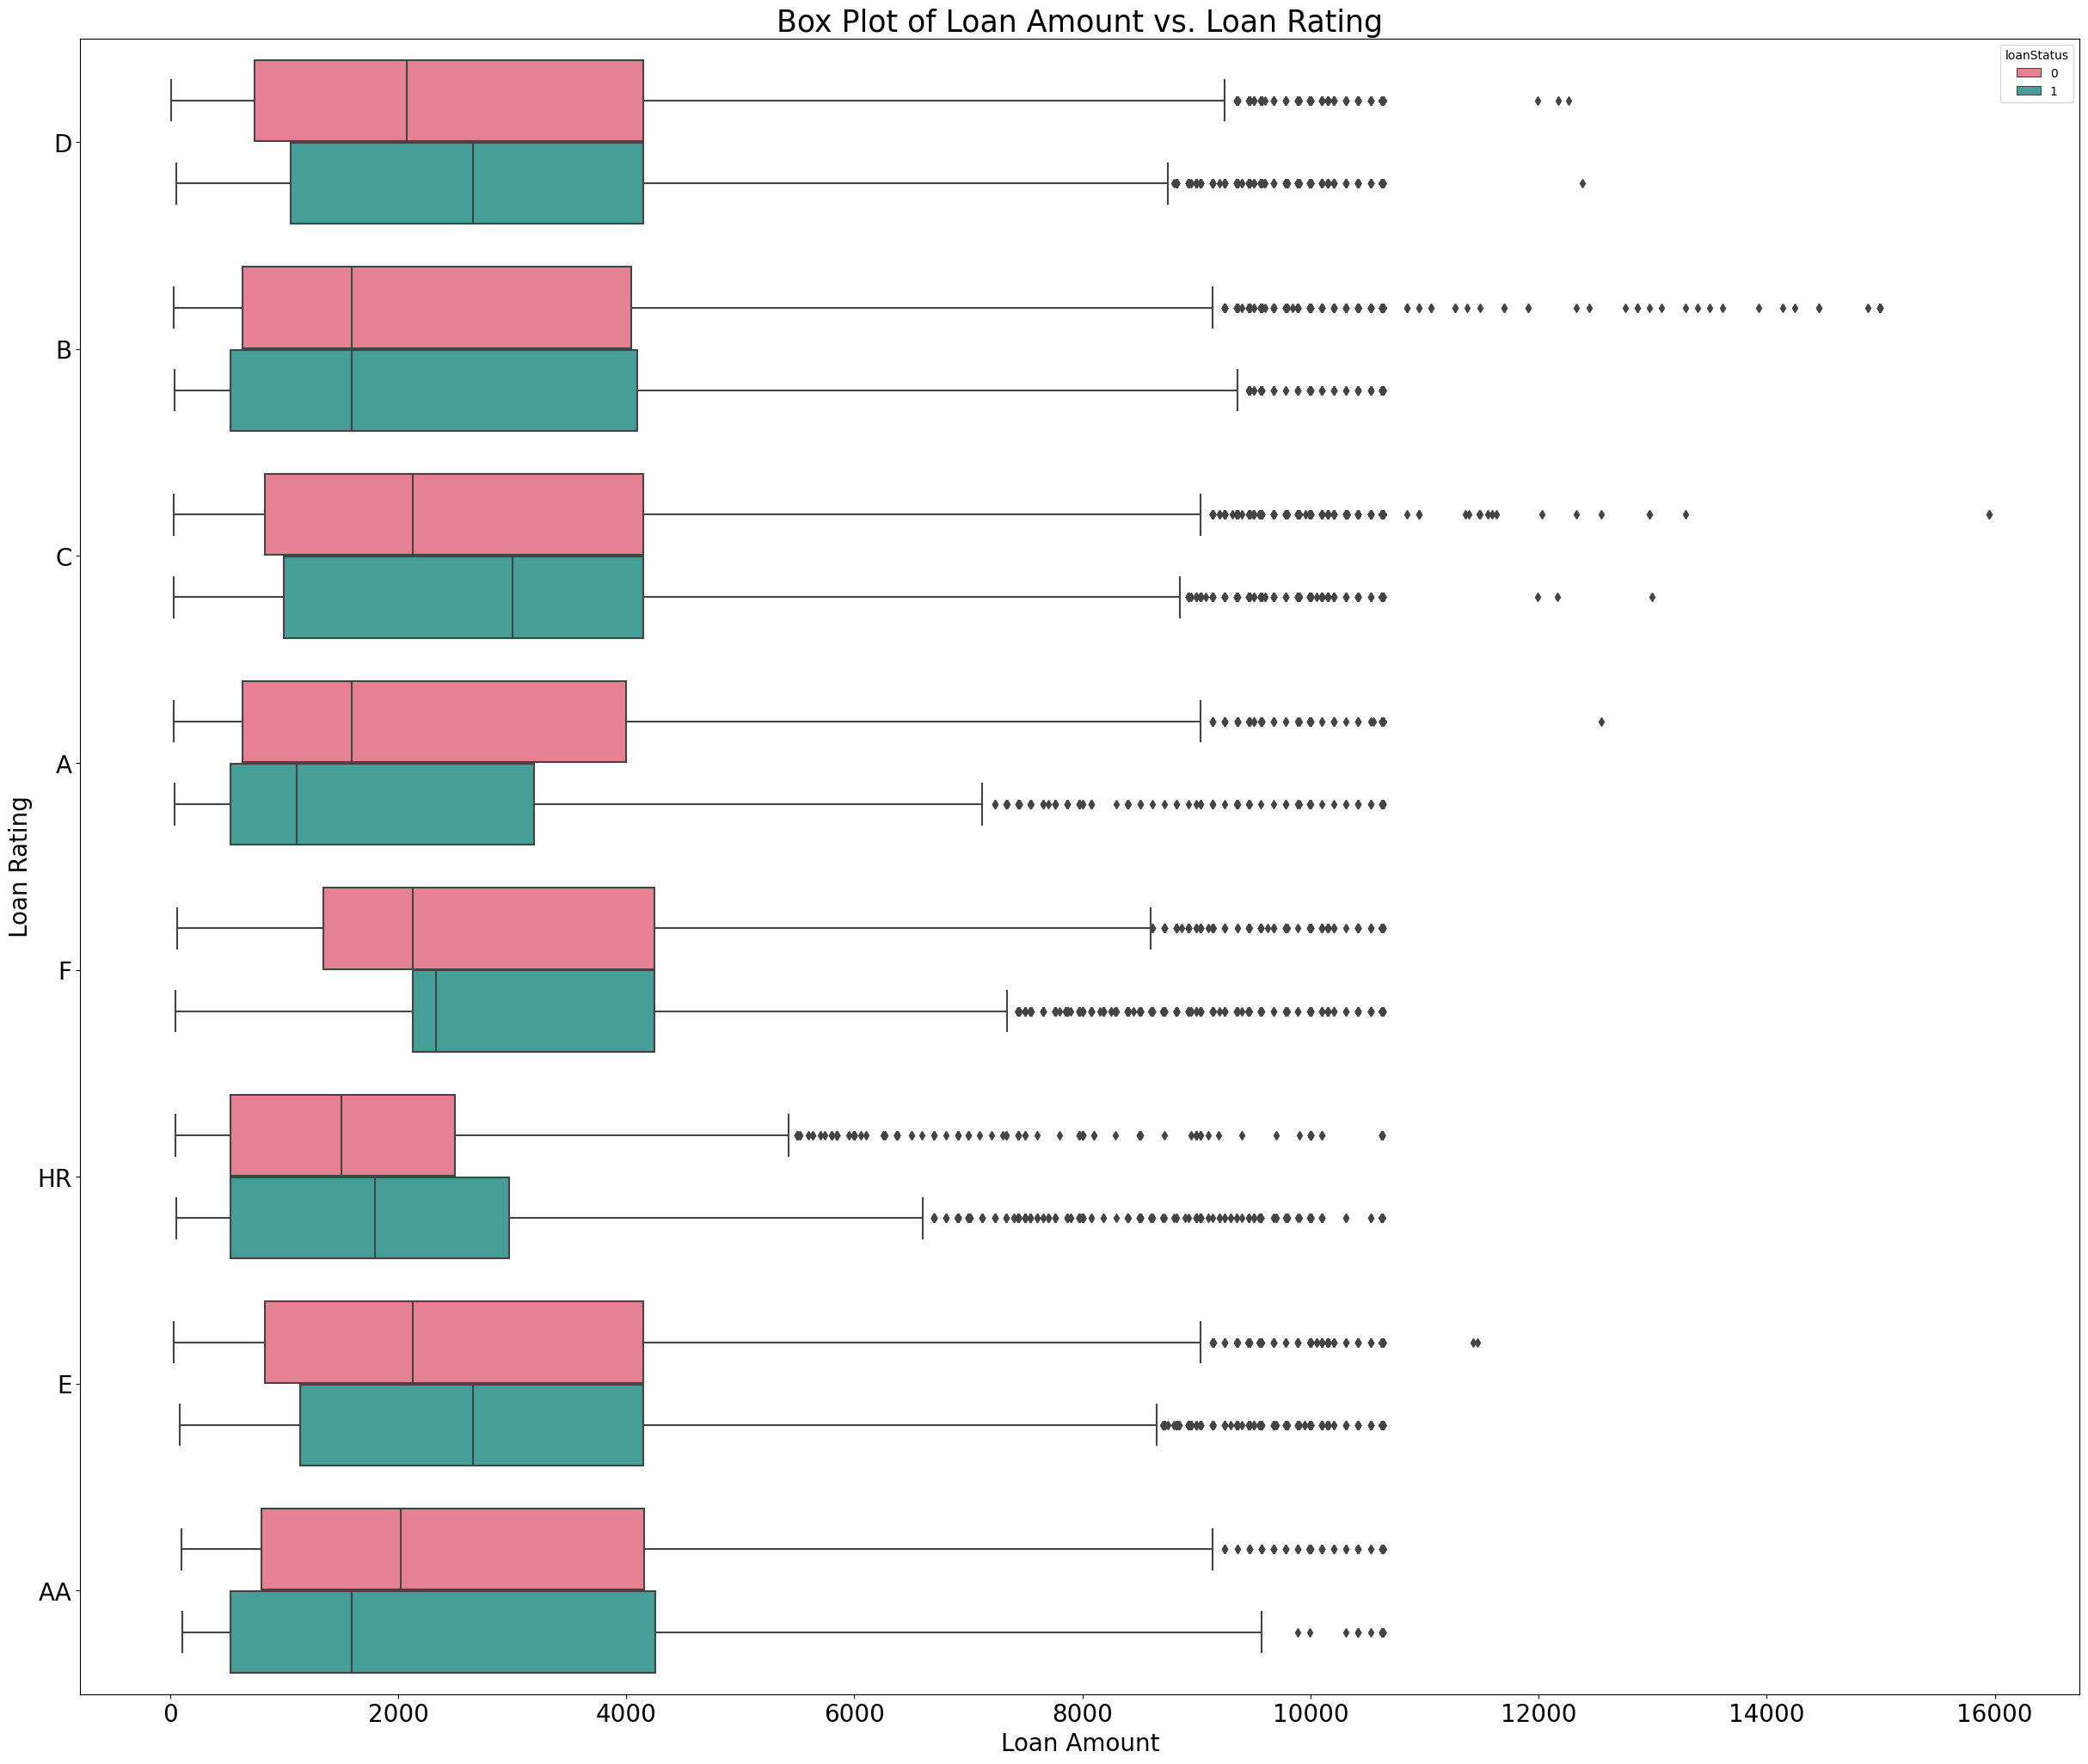

In [68]:
# Plot the borrower's Loan Amount compared to Loan Rating
plt.figure(figsize=(30,25))
sns.boxplot(x="AppliedAmount", y="Rating", data=df, palette="husl",hue='loanStatus')
plt.title('Box Plot of Loan Amount vs. Loan Rating', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Loan Rating', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

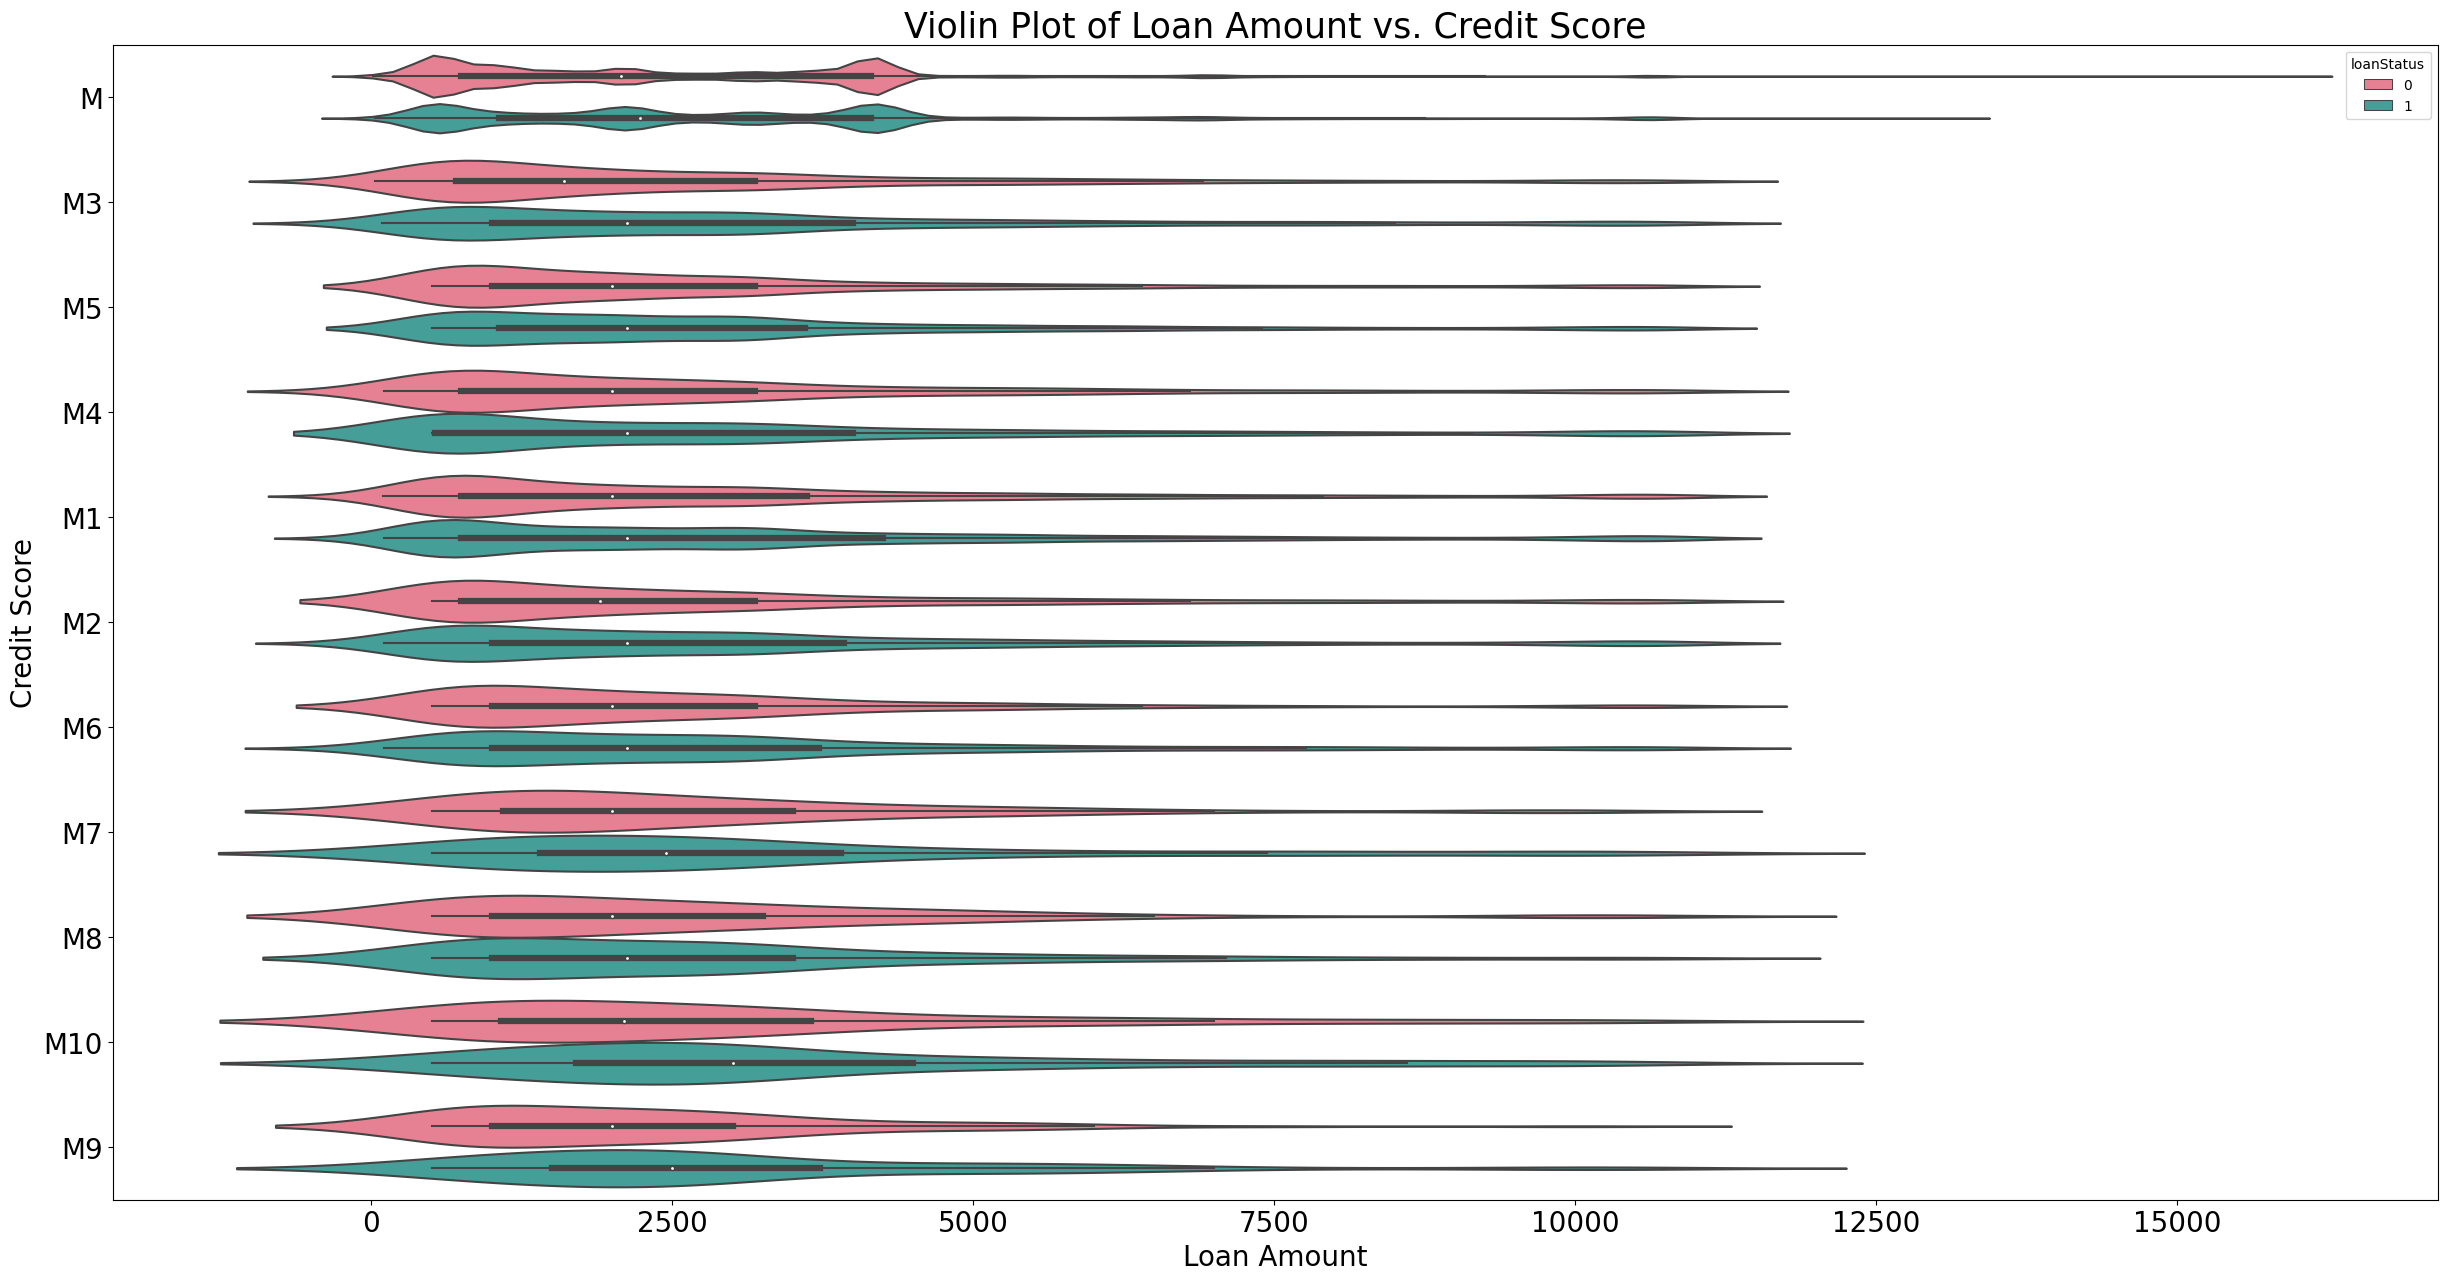

In [70]:
plt.figure(figsize=(30,15))
sns.violinplot(x="AppliedAmount", y="CreditScoreEsMicroL", data=df, palette="husl",hue='loanStatus')
plt.title('Violin Plot of Loan Amount vs. Credit Score', fontsize=25)
plt.xlabel('Loan Amount', fontsize=20)
plt.ylabel('Credit Score', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

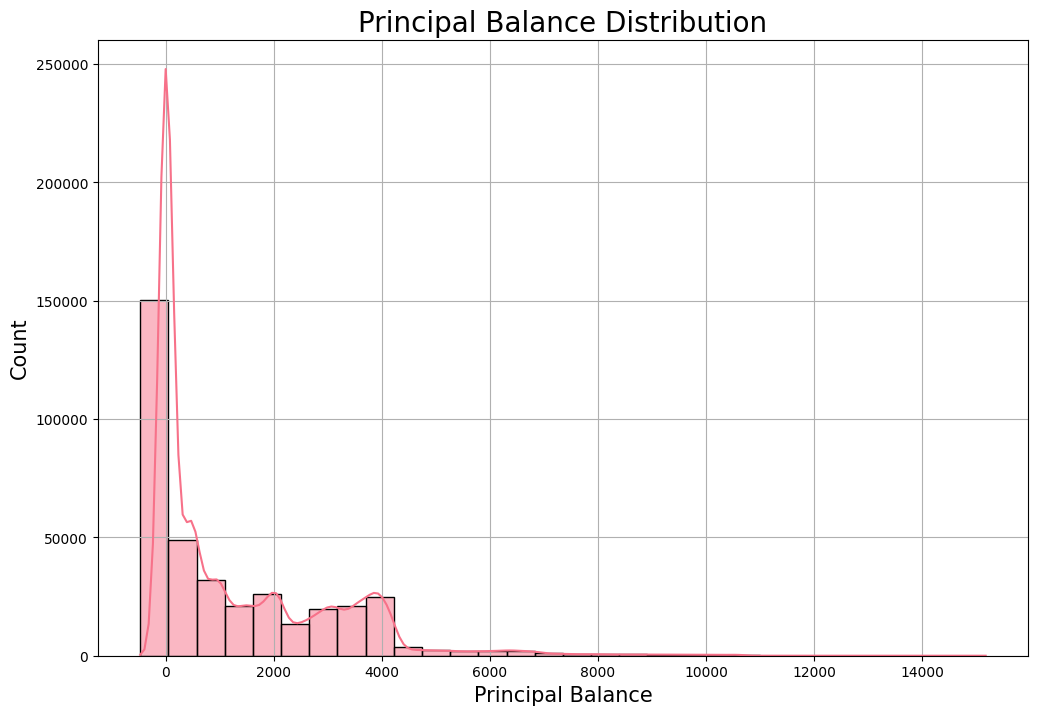

In [74]:
# plot principal balance of borrowers distribution if they have defaulted or not
fig = plt.figure(figsize=(12,8))
sns.histplot(df['PrincipalBalance'], bins=30, kde=True)
plt.title('Principal Balance Distribution', fontsize=20)
plt.xlabel('Principal Balance', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.grid(True)
plt.show()


Text(0, 0.5, 'Loan Amount')

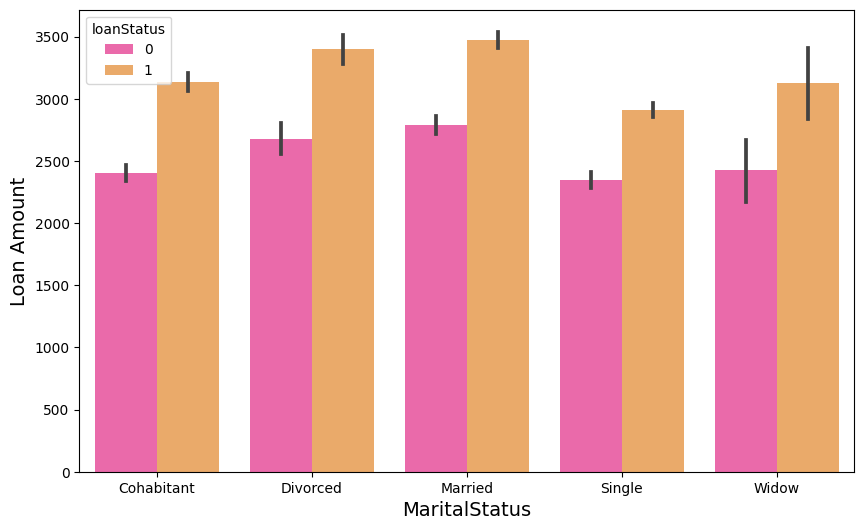

In [77]:
# Bar plot of Term (Loan taken for MaritalStatus)
plt.figure(figsize=(10,6))
sns.barplot(x="MaritalStatus",y= "AppliedAmount", data=df, palette='spring',hue='loanStatus')
plt.xlabel("MaritalStatus", fontsize=14)
plt.ylabel("Loan Amount", fontsize=14)

### reasonable as you are married the loan amount increase

Text(0, 0.5, 'count')

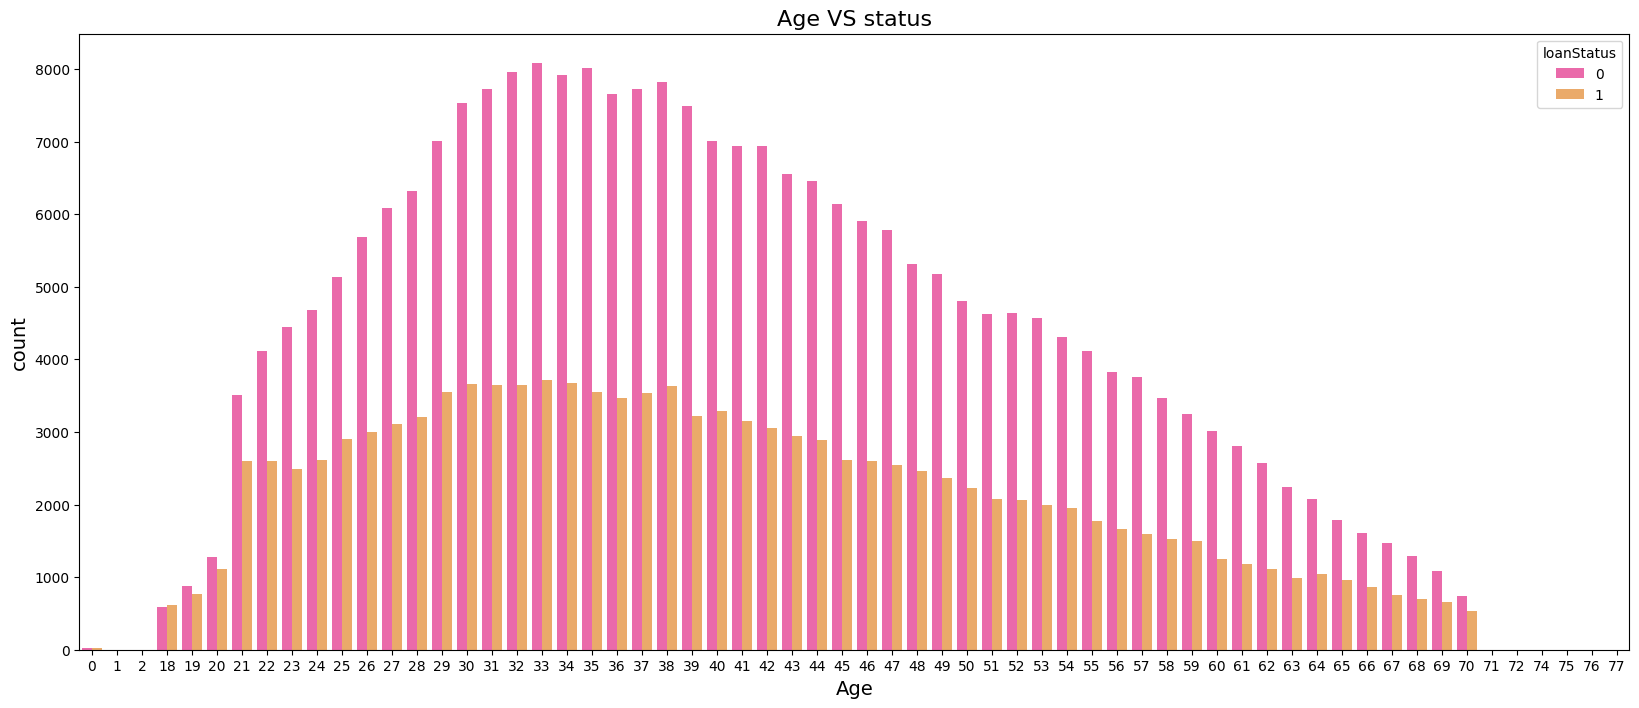

In [85]:
# Bar plot of Term (Loan taken for number of months)
plt.figure(figsize=(20,8))
sns.countplot(x="Age", data=df, palette='spring',hue='loanStatus')
plt.title("Age VS status", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("count",fontsize=14)

Text(0, 0.5, 'Age')

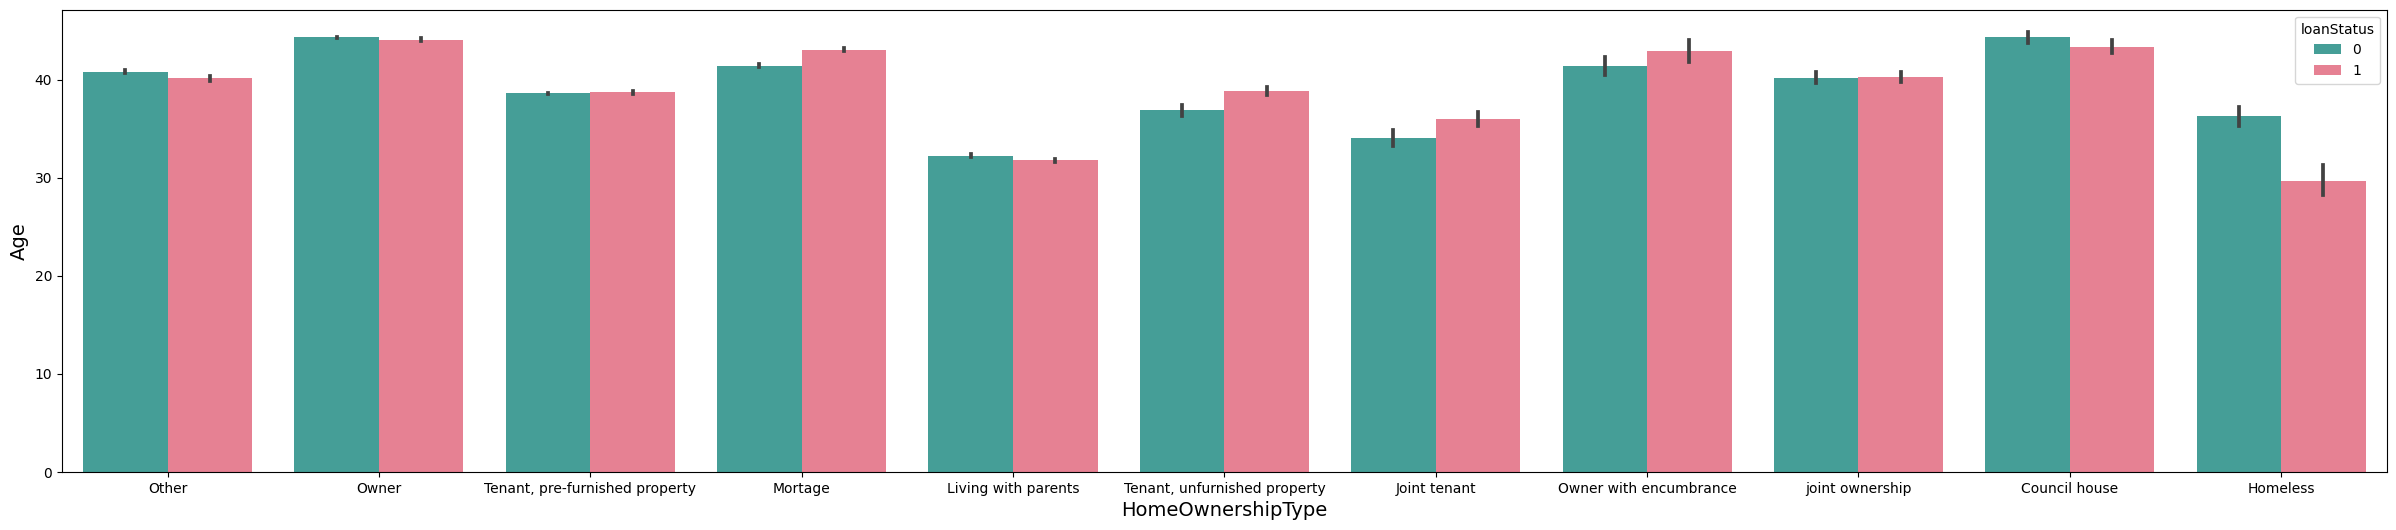

In [95]:

plt.figure(figsize=(30,6))
sns.barplot(x ="HomeOwnershipType", y="Age", data=df,hue='loanStatus',palette=['C3','C6'])
plt.xlabel("HomeOwnershipType", fontsize=14)
plt.ylabel("Age", fontsize=14)

### being an owner of house increases your chance of getting the load

#                                                                               Feature Engineering

- Cardinality

<Axes: >

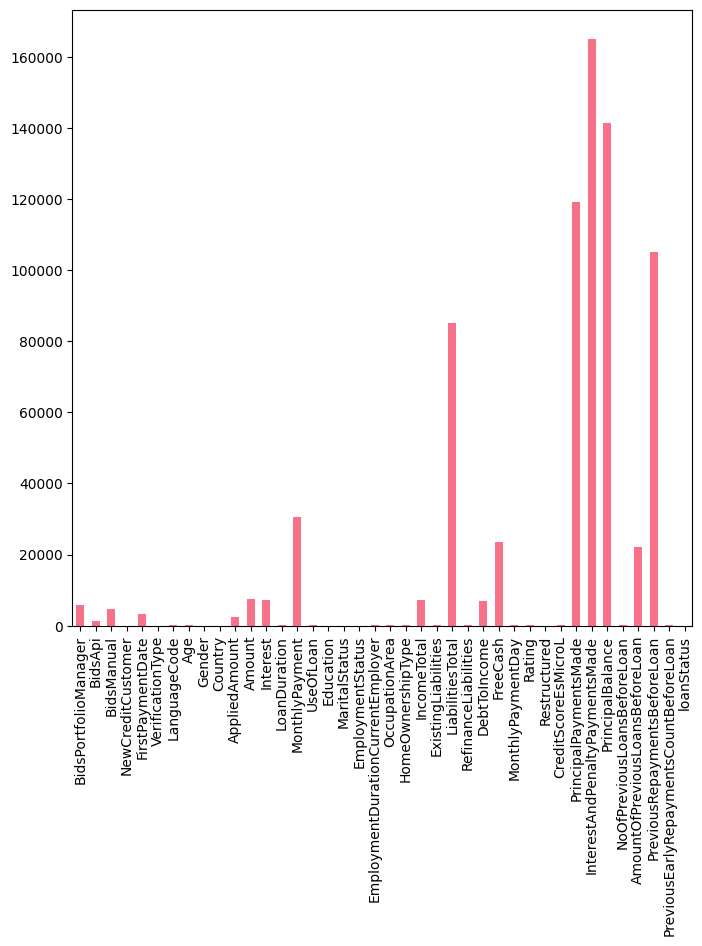

In [96]:
#define cardenality of each variable
df.nunique().plot.bar(figsize=(8,8))

In [100]:

X = df.copy()
y = X.pop("loanStatus")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# # All discrete features should now have integer dtypes (double-check this before using MI!)
# discrete_features = X.dtypes=='int64'

# remove nan values from X and reflect on y
X = X.fillna(X.mean())
y = y[X.index]
        

In [101]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y)
mi_scores[::3]  # show a few features with their MI scores

PrincipalPaymentsMade    0.167346
MonthlyPayment           0.110167
BidsPortfolioManager     0.084964
Rating                   0.070169
Country                  0.043994
IncomeTotal              0.025723
CreditScoreEsMicroL      0.018453
LiabilitiesTotal         0.014500
OccupationArea           0.013632
HomeOwnershipType        0.012071
BidsApi                  0.007443
MonthlyPaymentDay        0.003108
NewCreditCustomer        0.000281
Name: MI Scores, dtype: float64

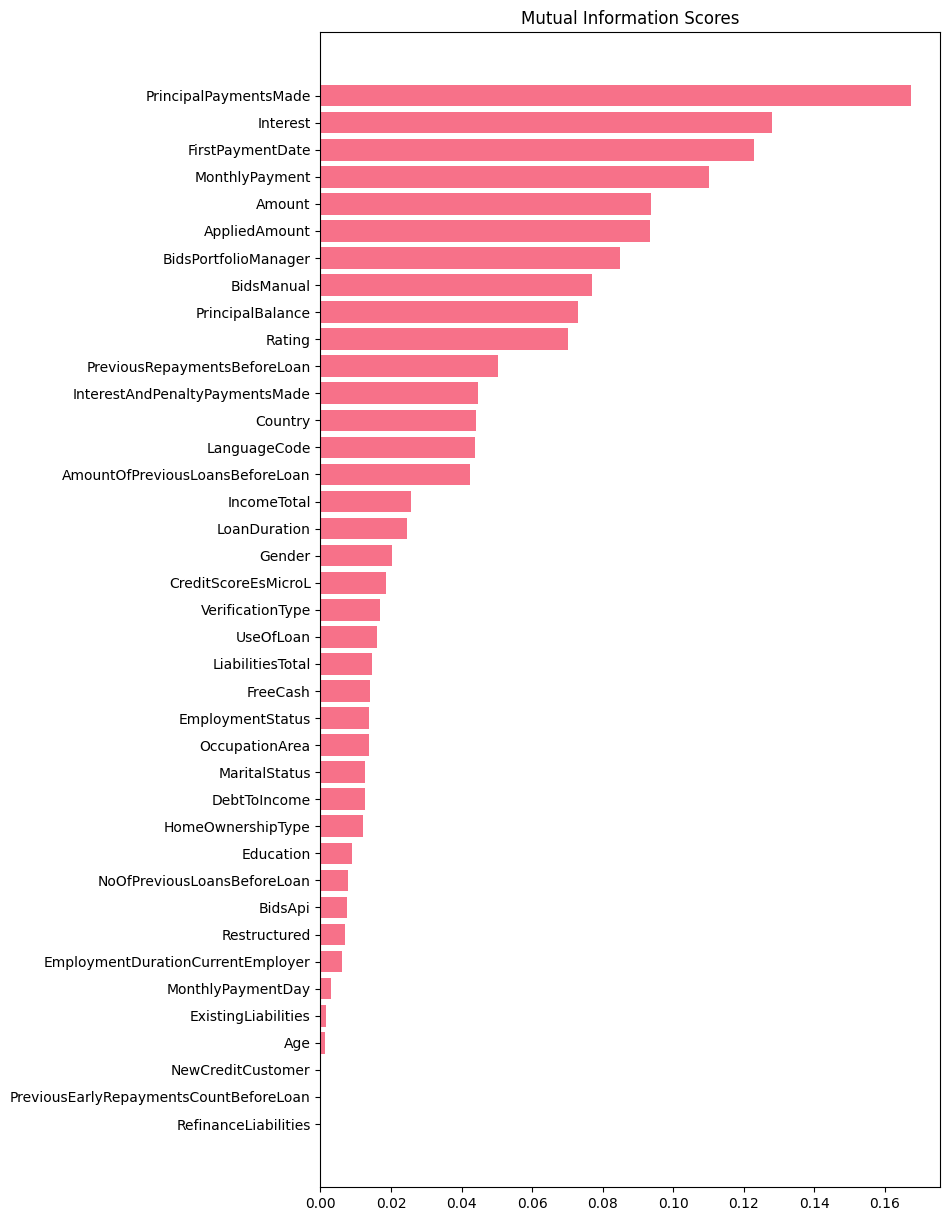

In [102]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 15))
plot_mi_scores(mi_scores)

## ExtraTreesClassifier method

In [103]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.04095075 0.01511442 0.03197973 0.00792911 0.09129168 0.01439705
 0.02026758 0.02352286 0.02238553 0.02228505 0.03003618 0.03103398
 0.05229034 0.02251375 0.02753323 0.00430514 0.01909207 0.008849
 0.00778811 0.01802914 0.00498832 0.01936697 0.0213051  0.01811158
 0.01906327 0.00173961 0.00422484 0.00265764 0.02231425 0.05019173
 0.01772431 0.00813146 0.10096199 0.07549222 0.07274195 0.01376139
 0.01569644 0.01595383 0.00397838]


<function matplotlib.pyplot.show(close=None, block=None)>

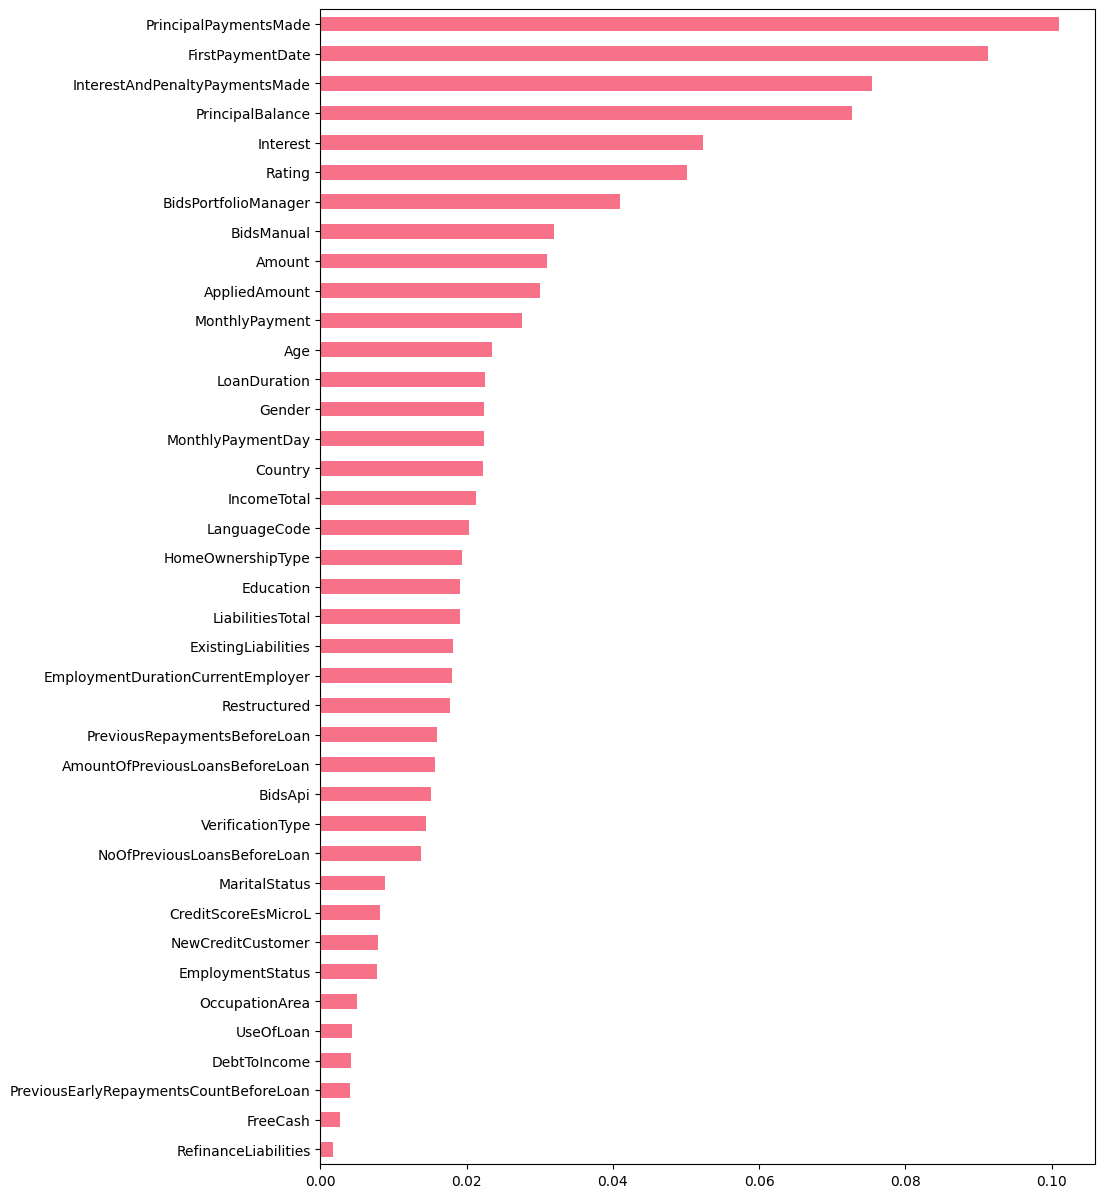

In [104]:
featureImportance=pd.Series(model.feature_importances_,index=X.columns)
plt.figure(dpi=100, figsize=(10, 15))

featureImportance.sort_values(ascending=True).plot(kind='barh')
plt.show